In [622]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from scipy import interpolate
from datetime import datetime, timedelta
from scipy.io import loadmat
from importlib import reload
import warnings
sys.path.append('/home/hp/git/ocean-wave')
import buoys
import waveproc
import wavegroup
import waveplot
reload(buoys)
reload(waveproc)
reload(wavegroup)
reload(waveplot)
#warnings.filterwarnings("ignore")
plt.close('all')


In [623]:
def plot_rogue_gf_bfi(boia, limiar, ind_fw):
    """
    """
    fig = plt.figure(figsize=(10, 6))

    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212, sharex=ax1)
    # ax3 = fig.add_subplot(413, sharex=ax1)
    # ax4 = fig.add_subplot(414, sharex=ax1)

    ax1.plot(boia.hs, label='Hs')
    ax1.plot(boia.hmax, label='Hmax')
    ax1.vlines(x=boia.index[ind_fw], ymin=0, ymax=10, lw=1.0, color='r', linestyle='--')
    ax1.legend(ncol=2)
    ax1.grid()
    ax1.set_xlim(boia.index[0], boia.index[-1])
    ax1.set_ylabel('Altura [m]')
    ax1.set_yticks(np.arange(0, 11));
    ax1.set_ylim(0, 10)

    # ax2.plot(boia.BFI)
    # ax2.set_ylabel('BFI')
    # ax2.grid()
    # ax2.set_ylim(0, 0.5)

    # ax3.plot(boia.GF_hilbert, '.')
    # ax3.set_ylabel('GF')
    # ax3.grid()
    # ax3.set_ylim(0.3, 0.5)

    ax2.plot(boia.hmax/boia.hs)
    ax2.plot(boia.hmax[ind_fw]/boia.hs[ind_fw], 'ro')
    ax2.set_ylabel('Hmax / Hs')
    ax2.axhline(y = limiar, color = 'k', linestyle = '--')
    ax2.set_yticks(np.arange(1.2, 3.0, 0.2));
    ax2.set_ylim(1.2, 2.8)
    ax2.grid()
    return fig

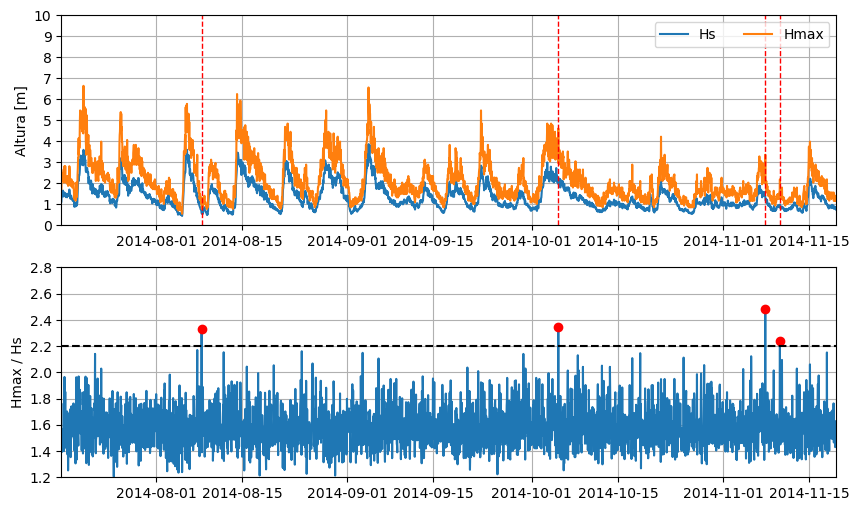

In [624]:

pth = '../data/proc/'

boia = pd.read_csv(pth + 'param_siodoc_16.csv',
                        parse_dates=True, index_col='date')

# boia = boia.rolling(window=3, center=True).mean()#.loc['2014-08']

boia = boia.iloc[:-1, :]

limiar = 2.2
ind_fw = np.where(boia.hmax / boia.hs > limiar)[0]

# plotagem das rogue waves
fig = plot_rogue_gf_bfi(boia, limiar, ind_fw)

In [625]:
rogue_waves_ordenadas = boia.iloc[ind_fw][['hm0', 'tp', 'thmax', 'hmax',
                                           'hmaxhs', 'Qp', 'v', 'GF_hilbert']].sort_values(by='hmaxhs',
                                           ascending=False).round(2)
rogue_waves_ordenadas

,hm0,tp,thmax,hmax,hmaxhs,Qp,v,GF_hilbert
date,,,,,,,,
2014-11-07 21:00:00,1.54,11.64,10.75,3.36,2.48,1.64,0.61,0.44
2014-10-05 07:00:00,2.18,10.67,8.86,4.61,2.35,2.13,0.44,0.45
2014-08-08 10:00:00,0.66,9.85,7.75,1.33,2.33,1.68,0.47,0.42
2014-11-10 06:00:00,1.05,6.10,5.98,2.19,2.24,1.82,0.40,0.41


In [626]:
pth_raw = '../data/raw/'
pth_out = '../data/proc/'

N = 1024
Fs = 1.0
t = np.arange(0, N, Fs)

#carrega arquivos .mat
hvmat = loadmat(pth_raw + 'heave.mat')
ptmat = loadmat(pth_raw + 'pitch.mat')
rlmat = loadmat(pth_raw + 'roll.mat')
cpmat = loadmat(pth_raw + 'compass.mat')

#data de todos os arquivos com datetime
#  0    1    2    3     4    5  
# ano, mes, dia, hora, min, seg
data_all = hvmat['heave'][:, [0, 1, 2, 3, 4, 5]]
datat_all = [datetime(int(data_all[i,0]),int(data_all[i,1]),int(data_all[i,2]),
    int(data_all[i,3])) for i in range(len(data_all))]
datat1 = np.array(datat_all)

df_heave = pd.DataFrame(hvmat['heave'][:, 6:], index=datat1)
df_pitch = pd.DataFrame(ptmat['pitch'][:, 6:], index=datat1)
df_roll = pd.DataFrame(rlmat['roll'][:, 6:], index=datat1)
df_compass = pd.DataFrame(cpmat['compass'][:, 6:], index=datat1)

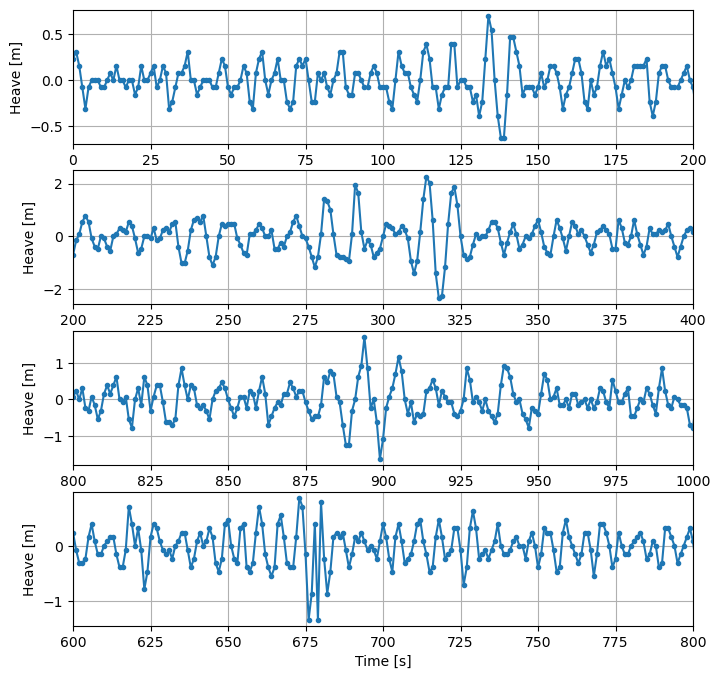

In [627]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 8))

df_heave.loc['2014-08-08 10:00:00'].plot(ax=ax1, xlim=(0, 200), style='-o', markersize=3, ylabel='Heave [m]')
df_heave.loc['2014-10-05 07:00:00'].plot(ax=ax2, xlim=(200, 400), style='-o', markersize=3, ylabel='Heave [m]')
df_heave.loc['2014-11-07 21:00:00'].plot(ax=ax3, xlim=(800, 1000), style='-o', markersize=3, ylabel='Heave [m]')
df_heave.loc['2014-11-10 06:00:00'].plot(ax=ax4, xlim=(600, 800), style='-o', markersize=3, ylabel='Heave [m]')

ax4.set_xlabel('Time [s]')

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

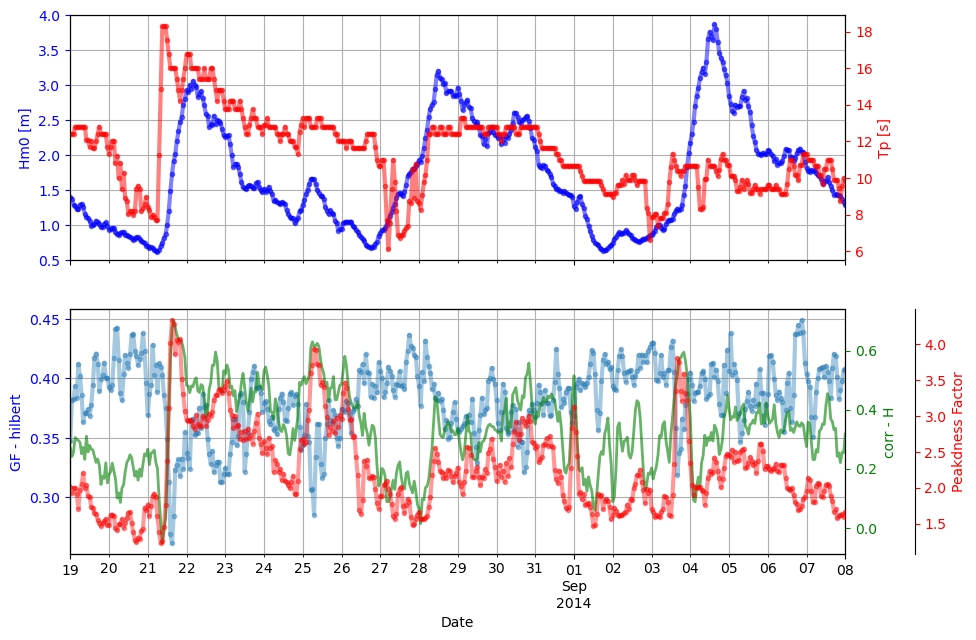

In [628]:
boia1 = boia.rolling(window=3, center=True).mean().loc['2014-08-19 00:00:00':'2014-09-8 00:00:00']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)
ax11 = ax1.twinx()
# ax3 = ax1.twinx()

boia1.hm0.plot(ax=ax1, color='blue', style='-o', markersize=3, linewidth=3, alpha=0.5)
boia1.tp.plot(ax=ax11, color='red', style='-o', markersize=3, linewidth=3, alpha=0.5)
# boia1.Qp.plot(ax=ax3, color='r', style='-o', markersize=3, linewidth=3, alpha=0.4)

ax1.set_xlabel('')
ax1.set_ylabel('Hm0 [m]', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(which='both')
ax1.set_ylim(0.5, 4)

ax11.set_ylabel('Tp [s]', color='r')
ax11.tick_params('y', colors='r')

ax22 = ax2.twinx()
ax222 = ax2.twinx()

boia1.GF_hilbert.plot(ax=ax2, style='-o', markersize=3, linewidth=3, alpha=0.4)
boia1.corr_H.plot(ax=ax22, color='green', style='-', markersize=3, linewidth=2, alpha=0.6)
boia1.Qp.plot(ax=ax222, color='r', style='-o', markersize=3, linewidth=3, alpha=0.4)

ax2.set_xlabel('Date')
ax2.set_ylabel('GF - hilbert', color='b')
ax2.tick_params('y', colors='b')
# ax2.grid(which='both')
# ax1.set_ylim(0.5, 4)

ax22.set_ylabel('corr - H', color='g')
ax22.tick_params('y', colors='g')
ax22.tick_params('y', colors='g')

ax222.spines['right'].set_position(('outward', 50))
ax222.set_ylabel('Peakdness Factor', color='r')
ax222.tick_params('y', colors='r')
ax222.set_ylabel('Peakdness Factor', color='r')
ax222.tick_params('y', colors='r')

# ax1.grid(which='both')
ax2.grid(which='both')

In [633]:
boia.loc['2014-08-21'][['hm0', 'tp', 'thmax', 'hmax', 'hmaxhs', 'Qp', 'v', 'GF_hilbert']].sort_values(by='Qp',
                                           ascending=False).round(2)

,hm0,tp,thmax,hmax,hmaxhs,Qp,v,GF_hilbert
date,,,,,,,,
2014-08-21 15:00:00,1.80,16.00,14.96,2.66,1.55,4.86,0.59,0.24
2014-08-21 19:00:00,2.49,14.22,15.18,3.59,1.47,4.80,0.58,0.29
2014-08-21 16:00:00,1.91,16.00,15.26,2.27,1.27,4.20,0.66,0.28
2014-08-21 14:00:00,1.49,16.00,16.15,1.80,1.27,3.94,0.69,0.27
2014-08-21 17:00:00,2.03,16.00,14.63,2.97,1.47,3.79,0.65,0.34
2014-08-21 21:00:00,2.49,14.22,14.22,3.05,1.26,3.71,0.56,0.31
2014-08-21 20:00:00,2.43,14.22,15.31,3.59,1.57,3.70,0.64,0.35
2014-08-21 18:00:00,2.10,16.00,14.93,3.36,1.68,3.59,0.66,0.35
2014-08-21 13:00:00,1.18,16.00,16.75,1.80,1.76,3.26,0.74,0.30


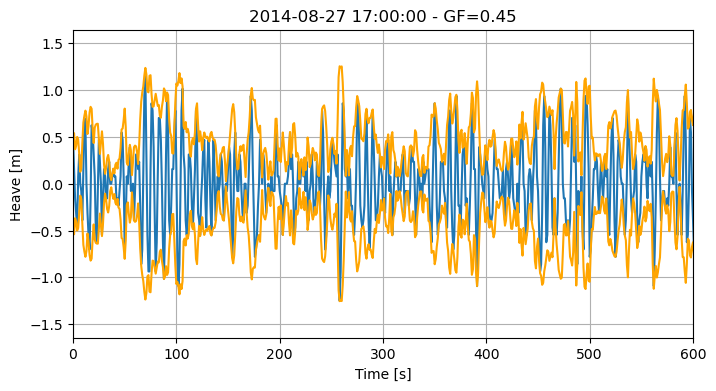

In [630]:
n1 = df_heave.loc['2014-08-27 17:00:00']
hh = waveproc.envelope_hilbert(n1.values, Fs=1)

fig, ax = plt.subplots(figsize=(8, 4))
n1.plot(ax=ax, style='-', markersize=3, ylabel='Heave [m]')
ax.plot(hh, markersize=3, color='orange')
ax.plot(hh*-1, markersize=3, color='orange')
ax.set_title('2014-08-27 17:00:00 - GF=0.45')
ax.set_xlabel('Time [s]')
ax.grid()
ax.set_xlim(0, 600);

Text(0.5, 0, 'Time [s]')

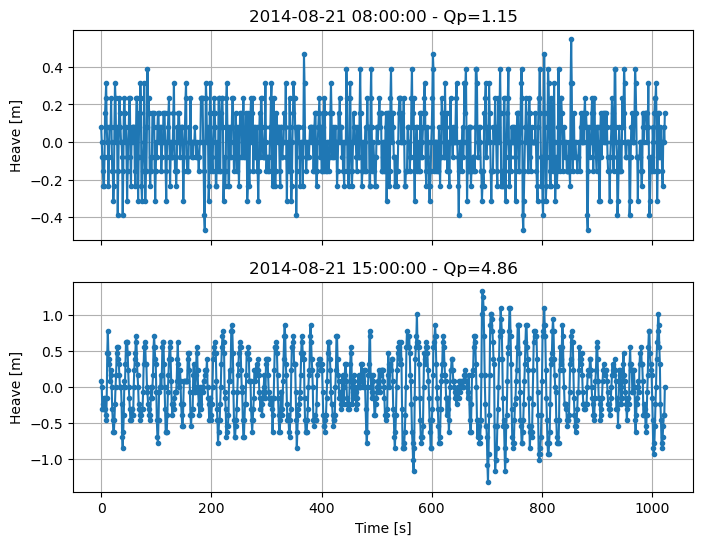

In [640]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

df_heave.loc['2014-08-21 08:00:00'].plot(ax=ax1, style='-o', markersize=3, ylabel='Heave [m]')
df_heave.loc['2014-08-21 15:00:00'].plot(ax=ax2, style='-o', markersize=3, ylabel='Heave [m]')

ax1.set_title('2014-08-21 08:00:00 - Qp=1.15')
ax2.set_title('2014-08-21 15:00:00 - Qp=4.86')

ax1.grid()
ax2.grid()

ax2.set_xlabel('Time [s]')



Plotar serie e espectros dos grupos de ondas

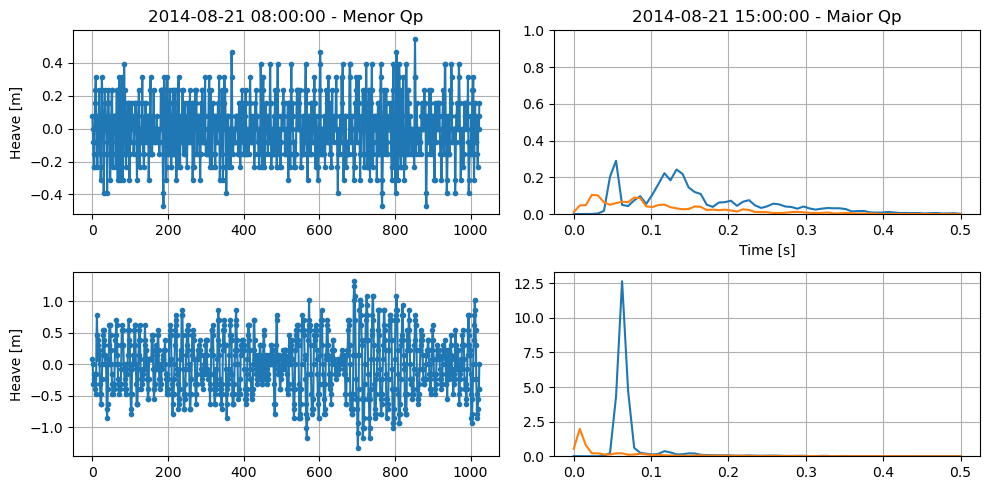

In [632]:
n1 = np.array(df_heave.loc['2014-08-21 08:00:00'])

t = np.arange(0, 1024, 1)
Fs = 1.0
NFFT = 128

# calcula o envelope de hilbert
hh = waveproc.envelope_hilbert(n1, Fs)


cc1, pp, tt = waveproc.waveproc(t=t,
                                s1=n1,
                                s2=[],
                                s3=[],
                                Fs=Fs,
                                NFFT=NFFT)

# parametros de grupos de onda do envelope de hilbert
cc_hilbert1, pp_hilbert, tt_hilbert = waveproc.waveproc(t=t,
                                                    s1=hh,
                                                    s2=[],
                                                    s3=[],
                                                    Fs=Fs,
                                                    NFFT=NFFT)


n1 = np.array(df_heave.loc['2014-08-21 15:00:00'])
t = np.arange(0, 1024, 1)
Fs = 1.0
NFFT = 128

# calcula o envelope de hilbert
hh = waveproc.envelope_hilbert(n1, Fs)


cc2, pp, tt = waveproc.waveproc(t=t,
                                s1=n1,
                                s2=[],
                                s3=[],
                                Fs=Fs,
                                NFFT=NFFT)

# parametros de grupos de onda do envelope de hilbert
cc_hilbert2, pp_hilbert, tt_hilbert = waveproc.waveproc(t=t,
                                                    s1=hh,
                                                    s2=[],
                                                    s3=[],
                                                    Fs=Fs,
                                                    NFFT=NFFT)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 5))

df_heave.loc['2014-08-21 08:00:00'].plot(ax=ax1, style='-o', markersize=3, ylabel='Heave [m]')
df_heave.loc['2014-08-21 15:00:00'].plot(ax=ax3, style='-o', markersize=3, ylabel='Heave [m]')

ax1.set_title('2014-08-21 08:00:00 - Menor Qp')
ax2.set_title('2014-08-21 15:00:00 - Maior Qp')

ax2.set_xlabel('Time [s]')

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

ax2.set_ylim(bottom=0)

ax2.plot(cc1.c11)
ax2.plot(cc_hilbert1.c11)

ax4.plot(cc2.c11)
ax4.plot(cc_hilbert2.c11)
ax4.set_ylim(bottom=0)

fig.tight_layout()